Downloading S&P500 Price Data

In [576]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import os

In [577]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

# Query Historical Prices
nasdaq = nasdaq.history(period="max")

In [578]:
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,0.0,0.0
2025-06-25 00:00:00-04:00,20013.949219,20052.779297,19918.080078,19973.550781,8256120000,0.0,0.0


In [579]:
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-13 00:00:00-04:00', '2025-06-16 00:00:00-04:00',
               '2025-06-17 00:00:00-04:00', '2025-06-18 00:00:00-04:00',
               '2025-06-20 00:00:00-04:00', '2025-06-23 00:00:00-04:00',
               '2025-06-24 00:00:00-04:00', '2025-06-25 00:00:00-04:00',
               '2025-06-26 00:00:00-04:00', '2025-06-27 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13714, freq=None)

#### Cleaning and Visualizing NASDAQ Data

<Axes: xlabel='Date'>

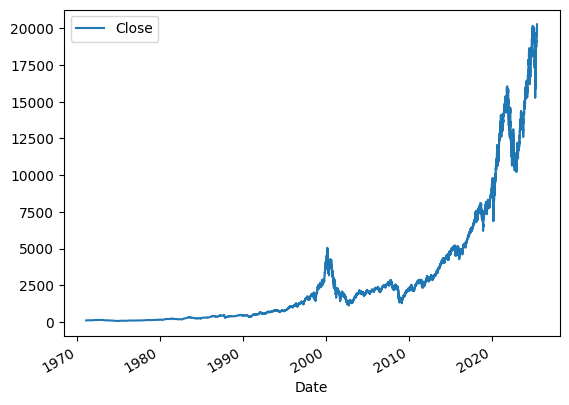

In [580]:
# Plot trend of data using DateTime index
nasdaq.plot.line(y="Close", use_index=True)

In [581]:
# Data cleaning to remove unessacary columns
del nasdaq["Dividends"]
del nasdaq["Stock Splits"]

#### Setting target for Machine Learning

In [582]:
# Set tomorrow's value
nasdaq["Tomorrow"] = nasdaq["Close"].shift(-1)


In [583]:
# Set Target (1 = positive direction and 0 = negative direction)
nasdaq["Target"] = (nasdaq["Tomorrow"] > nasdaq["Close"]).astype(int)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1
2025-06-25 00:00:00-04:00,20013.949219,20052.779297,19918.080078,19973.550781,8256120000,20167.910156,1


In [584]:
# Only use data after the year 2000 (Do this to eliminate any large market shift that may influence the overall direction of the market)
nasdaq = nasdaq.loc["2000-01-01":].copy()

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,3901.689941,0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3877.540039,0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3727.129883,0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3882.620117,1
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,4049.669922,1
...,...,...,...,...,...,...,...
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1
2025-06-25 00:00:00-04:00,20013.949219,20052.779297,19918.080078,19973.550781,8256120000,20167.910156,1


#### Train a machine learning model

lag-based time-series prediction (e.g., predicting future prices based on past data).

In [585]:
#X = nasdaq.iloc[["Close", "Volume", "Open", "High", "Low"]]  # All rows except the last 50
#y = nasdaq.iloc["Target"]   # All rows starting from row 50



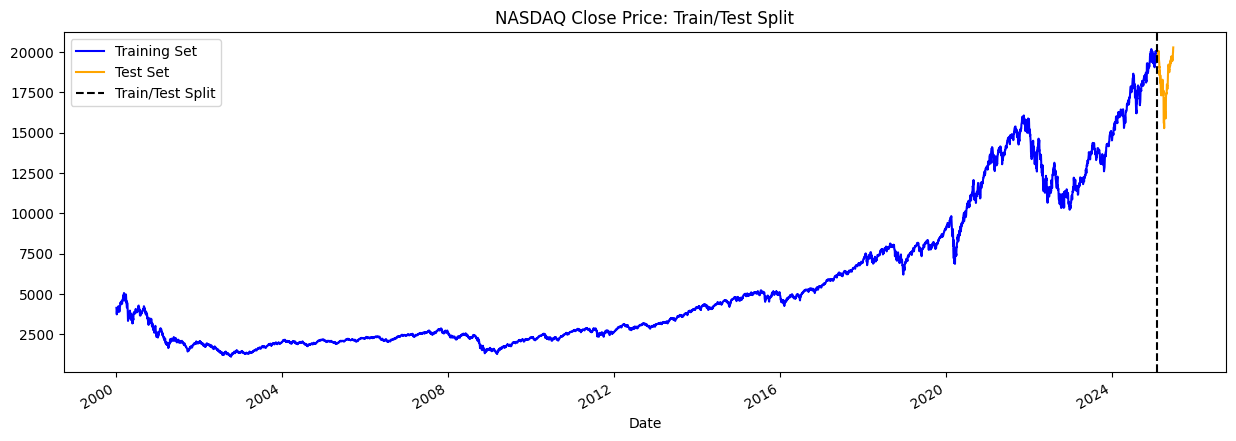

In [586]:
train = nasdaq.iloc[:-100]
test = nasdaq.iloc[-100:]

fig, ax = plt.subplots(figsize=(15, 5))

# Plot training and test data
train['Close'].plot(ax=ax, label='Training Set', color='blue')
test['Close'].plot(ax=ax, label='Test Set', color='orange')

# Add vertical line at the split point
split_date = test.index[0]
ax.axvline(split_date, color='black', linestyle='--', label='Train/Test Split')

# Add title and legend
ax.set_title("NASDAQ Close Price: Train/Test Split")
ax.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.47      0.74      0.57       470
           1       0.52      0.25      0.34       530

    accuracy                           0.48      1000
   macro avg       0.49      0.49      0.45      1000
weighted avg       0.49      0.48      0.45      1000

Fold 1 Accuracy: 0.479000000
              precision    recall  f1-score   support

           0       0.45      0.65      0.53       440
           1       0.58      0.38      0.45       560

    accuracy                           0.50      1000
   macro avg       0.51      0.51      0.49      1000
weighted avg       0.52      0.50      0.49      1000

Fold 2 Accuracy: 0.496000000
              precision    recall  f1-score   support

           0       0.44      0.61      0.51       440
           1       0.56      0.38      0.45       560

    accuracy                           0.48      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg    

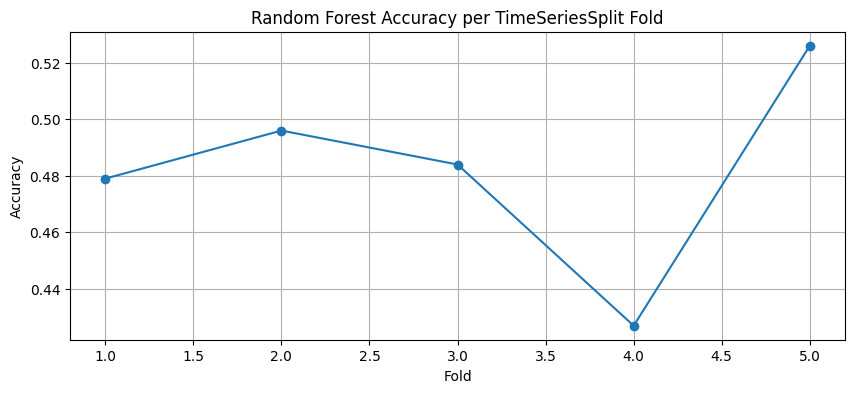

In [587]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Ensure data is sorted by time
nasdaq = nasdaq.sort_index()

# Define predictors and target
predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Target'

X = nasdaq[predictors]
y = nasdaq[target]

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Track accuracy scores
fold = 1
accuracies = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit and predict
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))

    # Evaluate
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.9f}")
    fold += 1

# Plot accuracy across folds
plt.figure(figsize=(10, 4))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title("Random Forest Accuracy per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [588]:
# Create varitey of rolling averages
horizons = [2,5,60,250,1000] # Horizons on how to look at rolling means. 2 days, 5 trading days,3 months 60 trading days, 250 = 1 year, 4 years =1000
new_predictors = []

for horizon in horizons:
    rolling_averages = nasdaq.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    nasdaq[ratio_column] = nasdaq["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nasdaq[trend_column] = nasdaq.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [589]:
nasdaq = nasdaq.dropna()
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1,0.997465,1.0,0.996048,2.0,1.075234,33.0,1.056862,143.0,1.314961,537.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1,1.004697,1.0,1.003147,3.0,1.083653,34.0,1.066387,144.0,1.326912,537.0
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1,1.007120,2.0,1.015342,3.0,1.097068,35.0,1.081115,145.0,1.345454,537.0


['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000']

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.08      0.14       471
           1       0.53      0.92      0.67       529

    accuracy                           0.53      1000
   macro avg       0.51      0.50      0.41      1000
weighted avg       0.51      0.53      0.42      1000

Fold 1 Accuracy: 0.5280
Fold 1 Precision: 0.5309

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.08      0.14       440
           1       0.56      0.92      0.70       560

    accuracy                           0.55      1000
   macro avg       0.51      0.50      0.42      1000
weighted avg       0.51      0.55      0.45      1000

Fold 2 Accuracy: 0.5530
Fold 2 Precision: 0.5613

Fold 3 Classification Report:
  

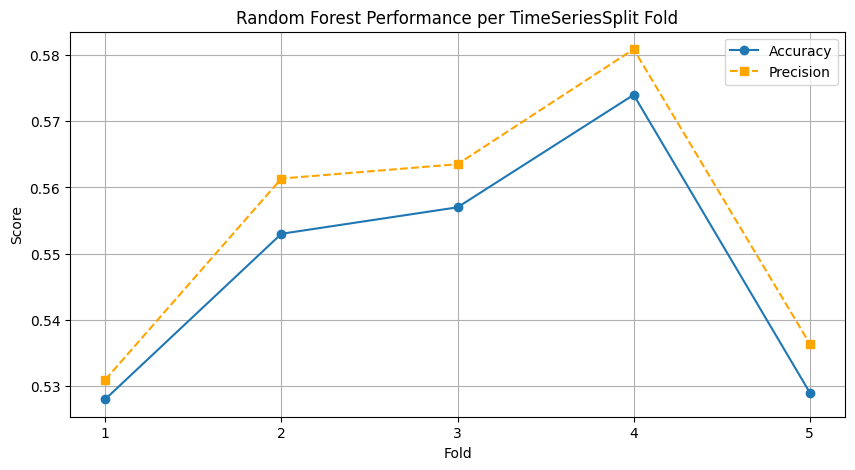

In [590]:
from sklearn.metrics import precision_score

# Ensure data is sorted by time
nasdaq = nasdaq.sort_index()

# Define predictors and target
predictors = new_predictors
target = 'Target'

X = nasdaq[new_predictors]
y = nasdaq[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Classification report
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_test, preds))

    # Accuracy and precision
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)  # Avoid divide-by-zero error

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1


# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

##### Fine tune model
create threshhold to increase the models precission. 
use new predictors to help improve model.

['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000']

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.64      0.53       471
           1       0.50      0.32      0.39       529

    accuracy                           0.47      1000
   macro avg       0.48      0.48      0.46      1000
weighted avg       0.48      0.47      0.46      1000

Fold 1 Accuracy: 0.4700
Fold 1 Precision: 0.4985

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.95      0.60       440
           1       0.51      0.04      0.08       560

    accuracy                           0.44      1000
   macro avg       0.47      0.50      0.34      1000
weighted avg       0.48      0.44      0.31      1000

Fold 2 Accuracy: 0.4410
Fold 2 Precision: 0.5102

Fold 3 Classification Report:
  

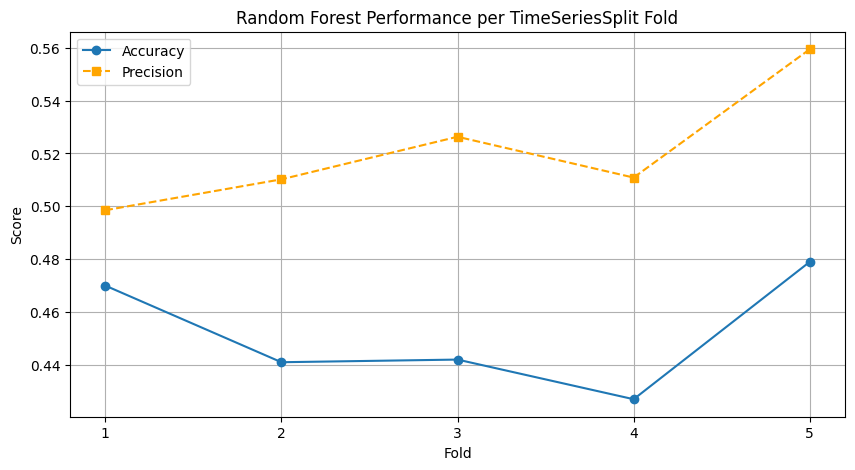

In [591]:
# Ensure data is sorted by time
nasdaq = nasdaq.sort_index()

# Define predictors and target
predictors = new_predictors
target = 'Target'

X = nasdaq[new_predictors]
y = nasdaq[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=1000, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=None)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    model.fit(X_train, y_train)

    # Predict with custom threshold
    proba_preds = model.predict_proba(X_test)[:, 1]
    preds = (proba_preds >= 0.6).astype(int)

    # Evaluation
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_test, preds))

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1

# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()


##### Creating a target to surpase with Model

In [592]:
# Number of Days NASDAQ actually rose
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.556205
0    0.443795
Name: count, dtype: float64

#### Improving the model

## Natural Language Processing of Sentiment Scores from r/Wallstreetbets

In [593]:
import csv
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [594]:
# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# List to hold date/polarity rows
sentiment_scores = []

file_path = 'nasdaq_posts.csv'

# Open CSV and analyze sentiment for each row
with open(file_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        title = row['Title']
        body = row['Body']
        date = row['Date']
        text = f"{title} {body}"  # Combine title and body

        doc = nlp(text)
        polarity = doc._.blob.polarity

        if polarity > 0:
            sentiment_label = "Positive"
        elif polarity < 0:
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        
        # Append (date, polarity) as a list
        sentiment_scores.append([date, round(polarity, 3)])
        
    
        print(f"Title: {title[:60]}...")
        print(f"Polarity score: {polarity:.3f} ({sentiment_label})")
        print(f"Date: {date}")
        print("-" * 50)

        
        

Title: Nasdaq didnt reclaim 10%. Dollar lost 9%....
Polarity score: 0.200 (Positive)
Date: 2025-04-14 02:18:27
--------------------------------------------------
Title: This morning NASDAQ dropped more than during Lehman Monday...
Polarity score: 0.250 (Positive)
Date: 2025-04-03 10:46:42
--------------------------------------------------
Title: Biggest one-day gain for the NASDAQ since 10/13/2008 - but d...
Polarity score: 0.011 (Positive)
Date: 2025-04-09 18:22:21
--------------------------------------------------
Title: Elon Musk's Brother Kimbal Musk And Other Tesla Execs Sell O...
Polarity score: -0.125 (Negative)
Date: 2025-02-07 10:41:24
--------------------------------------------------
Title: Jacked to the tits on puts - If NASDAQ is red tomorrow I'm 1...
Polarity score: 0.098 (Positive)
Date: 2024-12-01 18:16:20
--------------------------------------------------
Title: For all the idiots screaming bubble, here's what the Nasdaq ...
Polarity score: -0.800 (Negative)
Date: 2024

In [595]:
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1,0.997465,1.0,0.996048,2.0,1.075234,33.0,1.056862,143.0,1.314961,537.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1,1.004697,1.0,1.003147,3.0,1.083653,34.0,1.066387,144.0,1.326912,537.0
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1,1.007120,2.0,1.015342,3.0,1.097068,35.0,1.081115,145.0,1.345454,537.0


In [596]:
# Step 1: Convert the sentiment_scores list to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores, columns=["Date", "Polarity"])


twitter_df = sentiment_scores_df.groupby([sentiment_scores_df['Date']]).mean()
print(twitter_df.shape)


(236, 1)


In [597]:
twitter_df

print("Duplicates in NASDAQ index:", nasdaq.index.duplicated().sum())
print("Duplicates in Twitter index:", twitter_df.index.duplicated().sum())

Duplicates in NASDAQ index: 0
Duplicates in Twitter index: 0


In [598]:
from datetime import timezone, timedelta

# Fixed offset timezone (-05:00, no DST)
fixed_offset = timezone(timedelta(hours=-5))

# Make copies
twitter_df = twitter_df.copy()
nasdaq = nasdaq.copy()

# Ensure datetime and align timezone for NASDAQ
nasdaq.index = pd.to_datetime(nasdaq.index).normalize()
if nasdaq.index.tz is None:
    nasdaq.index = nasdaq.index.tz_localize(fixed_offset)
else:
    nasdaq.index = nasdaq.index.tz_convert(fixed_offset)

# Ensure datetime and align timezone for Twitter
twitter_df.index = pd.to_datetime(twitter_df.index).normalize()
if twitter_df.index.tz is None:
    twitter_df.index = twitter_df.index.tz_localize(fixed_offset)
else:
    twitter_df.index = twitter_df.index.tz_convert(fixed_offset)

# Combine
nasdaq = nasdaq[~nasdaq.index.duplicated(keep="first")]
twitter_df = twitter_df[~twitter_df.index.duplicated(keep="first")]

# Now combine
combined = pd.concat([nasdaq, twitter_df], axis=1).dropna()
combined

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,Polarity
Date,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:00-05:00,11816.330078,11924.280273,11784.150391,11890.929688,3.848160e+09,11895.230469,1.0,1.012782,2.0,1.052081,4.0,1.052651,35.0,1.229825,156.0,1.542235,585.0,0.000
2020-11-10 00:00:00-05:00,11622.440430,11665.870117,11424.610352,11553.860352,4.736560e+09,11786.429688,1.0,0.993127,0.0,0.985075,3.0,1.019845,34.0,1.190172,156.0,1.494793,584.0,0.000
2020-12-10 00:00:00-05:00,12247.549805,12431.559570,12214.740234,12405.809570,4.518580e+09,12377.870117,0.0,1.002702,1.0,0.995464,4.0,1.069631,35.0,1.240145,157.0,1.576188,584.0,0.000
2021-01-25 00:00:00-05:00,13681.209961,13728.980469,13368.679688,13635.990234,7.193710e+09,13626.059570,0.0,1.003419,2.0,1.012107,5.0,1.099896,39.0,1.305106,156.0,1.686453,586.0,0.059
2021-01-28 00:00:00-05:00,13323.290039,13507.639648,13316.519531,13337.160156,9.959270e+09,13070.690430,0.0,1.002502,1.0,0.989215,3.0,1.065576,39.0,1.270421,155.0,1.644770,585.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 00:00:00-05:00,19422.169922,19666.439453,19408.179688,19654.019531,6.477050e+09,19692.330078,1.0,1.006712,1.0,1.002884,2.0,1.008640,31.0,1.113312,142.0,1.369588,533.0,0.000
2025-02-05 00:00:00-05:00,19533.050781,19696.939453,19498.900391,19692.330078,6.712220e+09,19791.990234,1.0,1.000974,2.0,1.004224,3.0,1.009994,31.0,1.114451,142.0,1.371716,533.0,0.000
2025-02-07 00:00:00-05:00,19774.869141,19862.539062,19489.359375,19523.400391,7.748940e+09,19714.269531,1.0,0.993168,1.0,0.995546,3.0,1.000680,30.0,1.102952,141.0,1.358891,533.0,0.283


Accuracy: 0.5333
Precision: 0.5385


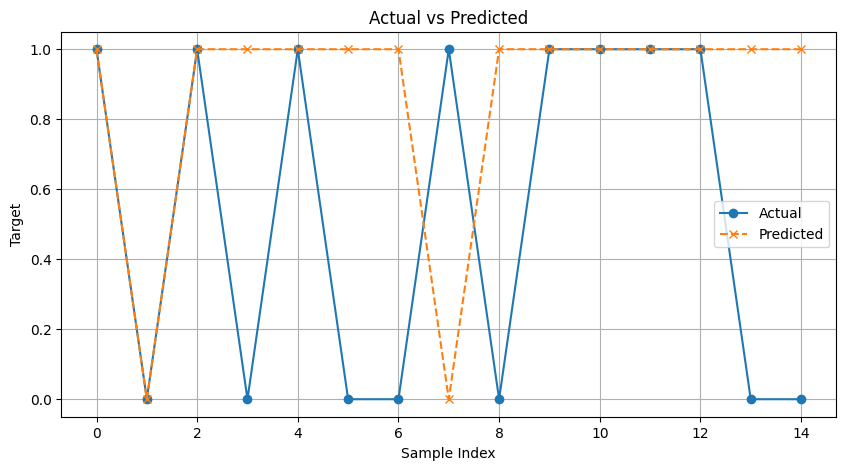

In [605]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

# Ensure data is sorted by time
combined = combined.sort_index()

# Make sure "Polarity" is in your predictors list
if "Polarity" not in new_predictors:
    new_predictors.append("Polarity")

target = 'Target'

# Features and target
X = combined[new_predictors]
y = combined[target]

# Manual train/test split
train_size = 56  # or len(X) - 15
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize model
model = RandomForestClassifier(n_estimators=5, min_samples_split=15, random_state=1)

# Train and predict
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds, zero_division=0)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")

# Optional: Plot predicted vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(preds, label="Predicted", marker="x", linestyle="--")
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


In [604]:

# Ensure data is sorted by time
combined = combined.sort_index()

# Append "Polarity"
predictors = new_predictors.append("Polarity")

# Define predictors and target
target = 'Target'

X = combined[new_predictors]
y = combined[target]

print(new_predictors)

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3, test_size=15, gap=0)

# Initialize model
model = RandomForestClassifier(n_estimators=5, min_samples_split=15, random_state=1)

# Track accuracy scores
fold = 1
accuracies = []
precisions = []

for train_idx, test_idx in tss.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Classification report
    #print(f"\nFold {fold} Classification Report:")
    #print(classification_report(y_test, preds))

    # Accuracy and precision
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)  # Avoid divide-by-zero error

    accuracies.append(acc)
    precisions.append(prec)

    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"Fold {fold} Precision: {prec:.4f}")
    fold += 1


# Plot accuracy and precision
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), accuracies, marker='o', label='Accuracy')
plt.plot(range(1, 6), precisions, marker='s', label='Precision', linestyle='--', color='orange')
plt.title("Random Forest Performance per TimeSeriesSplit Fold")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(range(1, 6))
plt.legend()
plt.grid(True)
plt.show()

['Close_ratio_2', 'Trend_2', 'Close_ratio_5', 'Trend_5', 'Close_ratio_60', 'Trend_60', 'Close_ratio_250', 'Trend_250', 'Close_ratio_1000', 'Trend_1000', 'Polarity', 'Polarity', 'Polarity', 'Polarity', 'Polarity', 'Polarity']


ValueError: Found input variables with inconsistent numbers of samples: [15, 1000]